# Micro Earthquake Prediction Using Logistic Regression

### Table of Contents
<ul>
<li><a href="#lib">Python Libraries<a/></li>
<li><a href="#aim">Aim & Objectives<a/></li>
<li><a href="#explore">Data Exploration & Description<a/></li>
<li><a href="#preprocess">Data Preprocessing<a/></li>
<li><a href="#model">Logistic Regression Model Training<a/></li>
<li><a href="#cross">Model Cross Validation<a/></li>
<li><a href="#test">Model Testing<a/></li>
<li><a href="#conclusion">Conclusion<a/></li>
<li><a href="#reference">References<a/></li>
<ul>

<a id="lib"></a>
### Python Libraries

In [1]:
# Data processing
import numpy as np
import pandas as pd

# Data preprocessing
from sklearn.preprocessing import StandardScaler

# Logistic regression model training and evaluation
from sklearn.linear_model import LogisticRegression as lr
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Data visualisation
import matplotlib.pyplot as plt
import seaborn as sns

<a id="aim"></a>
### Aim & Objectives

> The primary aim of this work is to train a logistic regression model capable of predicting the occurrence of microearthquakes if provided with informative features which measure some underlying information. <br><br>
To achieve this aim, the following specific objectives have been outlined: <br>
1. Conduct adequate data exploration and preprocessing to ensure optimum model performance. <br>
2. Conduct adequate training of a logistic regression model to predict microearthquakes to an acceptable degree of accuracy. <br>
3. Validate and test the trained model with novel data points to ensure its ability to predict microearthquakes when provided with novel data. <br>
4. Provide insight on modifications required to implement a tanh function in place of the logistic (or sigmoid) function.

<a id="explore"></a>
### Data Exploration & Description

> Brief Description of Dataset
- Dataset contains microearthquake waveforms with labels indicating the occurrence or absence of microearthquakes
- It hosts a total of 6800 data points and 100 features, indexed from 0 through 99.
- Each feature is believed to measure and provide some underlying information about the occurrence or absence of microearthquakes
- Labels contained include 1 or 0, where 1 corresponds to microearthquake and 0 corresponds to noise (absence of microearthquake).

In [2]:
# Loads the dataset and labels
features, labels = np.load("features.npy"), np.load("label.npy")

In [3]:
# Converts the loaded dataset and labels into pandas dataframe for easy visualisation and statistical analysis
df_features = pd.DataFrame(features)
df_labels = pd.DataFrame(labels)

In [4]:
# Displays the first five rows of the features
df_features.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.0,0.0,0.030990,0.005665,0.042319,0.002333,0.000333,0.233922,0.153615,0.648451,...,0.060251,0.060090,0.059935,0.059787,0.059644,0.059507,65.070959,0.021690,0.074659,0.000002
1,0.0,0.0,0.023992,0.001666,0.045985,0.000000,0.000000,0.300900,0.193602,0.414528,...,0.009044,0.008956,0.008872,0.008790,0.008711,0.008635,74.326553,0.024776,0.073504,0.000002
2,1.0,0.0,0.005332,0.000000,0.015995,0.000000,0.000000,0.621460,0.305232,0.098634,...,0.662831,0.661856,0.660910,0.660008,0.659142,0.658311,338.960143,0.112987,0.171816,0.000004
3,1.0,0.0,0.002333,0.000000,0.010663,0.000000,0.000000,0.627124,0.326891,0.092636,...,1.235368,1.232399,1.229523,1.226726,1.224060,1.221514,287.007675,0.095669,0.221686,0.000005
4,1.0,1.0,0.001333,0.000000,0.008664,0.000000,0.000000,0.620127,0.324892,0.106631,...,0.695257,0.694793,0.694345,0.693912,0.693496,0.693095,690.902445,0.230301,0.303567,0.000006


In [5]:
# provides summary statistics of the features
df_features.describe()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
count,6800.000000,6800.000000,6800.000000,6800.000000,6800.000000,6800.000000,6800.000000,6800.000000,6800.000000,6800.000000,...,6800.000000,6800.000000,6800.000000,6800.000000,6800.000000,6800.000000,6800.000000,6800.000000,6800.000000,6.800000e+03
mean,0.630735,0.133824,0.010993,0.001921,0.021678,0.000947,0.000485,0.499814,0.255807,0.166239,...,0.317939,0.316996,0.316082,0.315196,0.314340,0.313513,280.799204,0.093600,0.167322,3.526858e-06
std,0.482641,0.340488,0.010682,0.003051,0.012459,0.001735,0.001044,0.169834,0.084536,0.122678,...,0.361851,0.361323,0.360822,0.360344,0.359892,0.359464,175.720220,0.058573,0.080605,1.699019e-06
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.084305,0.044652,0.021993,...,0.000109,0.000111,0.000079,0.000076,0.000117,0.000118,11.108712,0.003703,0.008730,1.840131e-07
25%,0.000000,0.000000,0.002666,0.000000,0.012329,0.000000,0.000000,0.328890,0.172276,0.097967,...,0.044417,0.043959,0.043585,0.043120,0.042806,0.042413,104.638832,0.034880,0.089069,1.877437e-06
50%,1.000000,0.000000,0.004665,0.000000,0.015661,0.000000,0.000000,0.604465,0.305898,0.108964,...,0.189603,0.187924,0.186792,0.185971,0.184688,0.183253,304.787948,0.101596,0.180970,3.814556e-06
75%,1.000000,0.000000,0.022326,0.003332,0.033989,0.001000,0.000333,0.617794,0.317561,0.180940,...,0.475038,0.473890,0.473257,0.472597,0.471843,0.470792,404.396980,0.134799,0.233520,4.922196e-06
max,1.000000,1.000000,0.042319,0.013329,0.052982,0.008664,0.005998,0.765412,0.482839,0.685438,...,3.086388,3.080982,3.075712,3.070699,3.065876,3.061250,1431.750187,0.477250,0.483015,1.018116e-05


In [6]:
# Displays the first five rows of the labels
df_labels.head()

,0
0,1.0
1,1.0
2,0.0
3,0.0
4,0.0


In [7]:
# displays the number of unique values within the labels
df_labels.value_counts()

0.0    4648
1.0    2152
dtype: int64

> From the summary statistics of the features presented, it can be observed that the features exist on largely varying scales. The feature indexed at 0 has a range of 1, which is in sharp contrast to the feature indexed at 96, which has a range of 1,420. A similar deduction can be observed for other features as well.<br><br>
For machine learning models such as logistic regression which employ the use of gradient descent, the utilization of features that exist on largely different scales may hinder the ability of gradient descent to converge swiftly (Gasso, 2019; Alshaher, 2021). The integration of feature scaling in the preprocessing stage is a solution to this challenge (Bisong, and Bisong, 2019). Therefore, given the variation in the scale of the features to be utilized for this work, feature scaling was integrated into the data preprocessing stage.<br><br>
The Scikit-Learn python library (Pedregosa, et al., 2011) utilized for the course of this work offers two methods for feature scaling; the first being normalization (MinMaxScaler) and the second being standardization (StandardScaler). While the difference between both methods is not pronounced, the standardization method (StandardScaler) was employed in carrying out feature scaling for this work because, unlike the normalization method, it preserves information about potential outliers within the dataset.<br><br>
From the .value_count() function called on the labels, it was confirmed that the ML problem is indeed a binary classification problem that can be handled by a logistic regression model. From this, it was also deduced that majority of our data points (4648 or ~68%) are noise and only a small fraction (2152 or ~30%) represent microearthquakes. This information buttressed the importance of ensuring that the data points were randomly distributed across the training, validation, and testing datasets to utilized.<br><br>

<a id="preprocess"></a>
### Data Preprocessing

> Information obtained from the data exploration and description stage informed the preprocessing stage and determined the type of preprocessing carried out on the dataset. Here, the primary preprocessing method integrated into this workflow was feature scaling. This process was subsequently followed by dataset splitting. <br><br>
Although the two-way data splitting scheme (training and testing) is not uncommon, for this work, the three-way data splitting scheme (Training, Cros validation, and Testing) was employed. While the cross-validation and testing phase are in essence a repetition, albeit with novel data points, the cross-validation phase was included because a greater amount of confidence can be ascribed to the performance of the model if it performs adequately on two sets of novel data points (cross-validation and test) as against using just the testing datase3t (Reitermanova, 2010).<br><br>
By convention, the 60-20-20 (approximately) convention corresponding to the size of the training, cross-validation, and testing data points was utilized, as this convention ensured that a large proportion of the data points were used in training the model.<br><br>

##### Step 1: Feature scaling

In [8]:
# Scales the features
scaled_df_features = StandardScaler().fit_transform(df_features)

In [9]:
# displays the summary statistics of scaled features
pd.DataFrame(scaled_df_features).describe()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
count,6.800000e+03,6.800000e+03,6.800000e+03,6.800000e+03,6.800000e+03,6.800000e+03,6.800000e+03,6.800000e+03,6.800000e+03,6.800000e+03,...,6.800000e+03,6.800000e+03,6.800000e+03,6.800000e+03,6.800000e+03,6.800000e+03,6.800000e+03,6.800000e+03,6.800000e+03,6.800000e+03
mean,-2.841191e-16,-9.465468e-17,2.160200e-16,4.754367e-17,-3.562510e-16,-3.830269e-16,4.441219e-16,-1.937013e-16,-1.654396e-16,1.000017e-16,...,-1.080069e-16,-7.244920e-17,1.053518e-16,-1.315094e-16,-1.905237e-17,1.942921e-16,-2.327876e-16,1.417167e-17,-9.350364e-17,3.003480e-16
std,1.000074e+00,1.000074e+00,1.000074e+00,1.000074e+00,1.000074e+00,1.000074e+00,1.000074e+00,1.000074e+00,1.000074e+00,1.000074e+00,...,1.000074e+00,1.000074e+00,1.000074e+00,1.000074e+00,1.000074e+00,1.000074e+00,1.000074e+00,1.000074e+00,1.000074e+00,1.000074e+00
min,-1.306937e+00,-3.930638e-01,-1.029144e+00,-6.295263e-01,-1.740117e+00,-5.457712e-01,-4.647685e-01,-2.446742e+00,-2.498009e+00,-1.175901e+00,...,-8.784112e-01,-8.770770e-01,-8.758513e-01,-8.745629e-01,-8.731696e-01,-8.719045e-01,-1.534885e+00,-1.534885e+00,-1.967659e+00,-1.967659e+00
25%,-1.306937e+00,-3.930638e-01,-7.795743e-01,-6.295263e-01,-7.504464e-01,-5.457712e-01,-4.647685e-01,-1.006492e+00,-9.881880e-01,-5.565518e-01,...,-7.559545e-01,-7.557139e-01,-7.552682e-01,-7.550998e-01,-7.545428e-01,-7.542320e-01,-1.002579e+00,-1.002579e+00,-9.708799e-01,-9.708792e-01
50%,7.651478e-01,-3.930638e-01,-5.923972e-01,-6.295263e-01,-4.829679e-01,-5.457712e-01,-4.647685e-01,6.162434e-01,5.925909e-01,-4.669092e-01,...,-3.546921e-01,-3.572473e-01,-3.583481e-01,-3.586415e-01,-3.602792e-01,-3.623999e-01,1.365267e-01,1.365267e-01,1.693421e-01,1.693439e-01
75%,7.651478e-01,-3.930638e-01,1.061001e+00,4.625649e-01,9.881640e-01,3.050895e-02,-1.454368e-01,6.947311e-01,7.305641e-01,1.198422e-01,...,4.341837e-01,4.342526e-01,4.356347e-01,4.368395e-01,4.376705e-01,4.375700e-01,7.034299e-01,7.034299e-01,8.213247e-01,8.213211e-01
max,7.651478e-01,2.544116e+00,2.932772e+00,3.738838e+00,2.512792e+00,4.448657e+00,5.283202e+00,1.563983e+00,2.685842e+00,4.232535e+00,...,7.651360e+00,7.650180e+00,7.648740e+00,7.647422e+00,7.646009e+00,7.644546e+00,6.550388e+00,6.550388e+00,3.916836e+00,3.916841e+00


> From the result of the summary statistics displayed above, It can be observed that the range for all features roughly varies between -3 through 3. Thus, indicating that the features have been successfully scaled

##### Step 2: Splitting the dataset

In [10]:
# Splits the dataset into test and main dataset after shuffling
main_set, test_set, main_labels, test_labels = train_test_split(scaled_df_features, np.array(df_labels), test_size= 1300, random_state=5)

# Splits the main dataset into train and cross validation datasets after re-shuffling main_set and main_labels
train_set, cross_val_set, train_labels, cross_val_labels = train_test_split(main_set, main_labels, test_size= 1300, random_state=5)

In [11]:
# displays the summary statistics of scaled training features
pd.DataFrame(train_set).describe()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
count,4200.000000,4200.000000,4200.000000,4200.000000,4200.000000,4200.000000,4200.000000,4200.000000,4200.000000,4200.000000,...,4200.000000,4200.000000,4200.000000,4200.000000,4200.000000,4200.000000,4200.000000,4200.000000,4200.000000,4200.000000
mean,-0.015337,-0.019622,0.009912,0.010309,0.010052,0.008830,0.008603,-0.011906,-0.012973,0.008255,...,-0.018135,-0.018137,-0.018138,-0.018137,-0.018136,-0.018134,-0.014449,-0.014449,-0.010857,-0.010857
std,1.004149,0.978588,1.001216,1.001927,1.001227,1.001168,1.004519,1.004681,1.004520,1.001652,...,0.971785,0.971737,0.971693,0.971651,0.971610,0.971571,0.990396,0.990396,0.998476,0.998476
min,-1.306937,-0.393064,-1.029144,-0.629526,-1.740117,-0.545771,-0.464768,-2.446742,-2.474357,-1.175901,...,-0.878382,-0.877054,-0.875741,-0.874445,-0.873166,-0.871905,-1.534885,-1.534885,-1.967659,-1.967659
25%,-1.306937,-0.393064,-0.779574,-0.629526,-0.750446,-0.545771,-0.464768,-1.046226,-1.019725,-0.553835,...,-0.761835,-0.761624,-0.761157,-0.760372,-0.759817,-0.759515,-1.010630,-1.010630,-0.977775,-0.977774
50%,0.765148,-0.393064,-0.592397,-0.629526,-0.482968,-0.545771,-0.464768,0.614281,0.584707,-0.461476,...,-0.357970,-0.359298,-0.360747,-0.362318,-0.363005,-0.364723,0.114768,0.114768,0.144770,0.144763
75%,0.765148,-0.393064,1.061001,0.571774,1.014912,0.222602,-0.145437,0.694731,0.730564,0.138857,...,0.433745,0.433840,0.433329,0.432477,0.433384,0.433785,0.700903,0.700903,0.810785,0.810788
max,0.765148,2.544116,2.932772,3.738838,2.512792,4.064470,5.283202,1.563983,2.685842,4.107579,...,7.046945,7.046829,7.046622,7.046337,7.045962,7.045499,6.539433,6.539433,3.916836,3.916841


In [12]:
# displays the summary statistics of scaled cross validation features
pd.DataFrame(cross_val_set).describe()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
count,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,...,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000
mean,0.012822,0.058810,-0.009844,0.004139,-0.013811,0.003025,-0.007879,0.015425,0.009198,-0.039607,...,0.009629,0.009549,0.009474,0.009398,0.009323,0.009248,0.020484,0.020484,0.005592,0.005592
std,0.996822,1.060146,0.999846,1.020261,0.999269,1.012282,0.994414,0.990459,0.999442,0.953611,...,1.020651,1.020696,1.020738,1.020779,1.020820,1.020859,1.031627,1.031627,1.010380,1.010380
min,-1.306937,-0.393064,-1.029144,-0.629526,-1.740117,-0.545771,-0.464768,-2.385914,-2.304847,-1.040078,...,-0.878266,-0.876934,-0.875617,-0.874317,-0.873034,-0.871769,-1.517327,-1.517327,-1.903898,-1.903899
25%,-1.306937,-0.393064,-0.779574,-0.629526,-0.750446,-0.545771,-0.464768,-0.965285,-0.954680,-0.559268,...,-0.738100,-0.737439,-0.736489,-0.735669,-0.734912,-0.734239,-0.985860,-0.985860,-0.975250,-0.975249
50%,0.765148,-0.393064,-0.592397,-0.629526,-0.509716,-0.545771,-0.464768,0.617224,0.600475,-0.477775,...,-0.359141,-0.362743,-0.366071,-0.370449,-0.371107,-0.370790,0.161859,0.161859,0.199105,0.199105
75%,0.765148,-0.393064,1.092197,0.462565,0.934668,0.030509,-0.464768,0.696693,0.734506,0.069588,...,0.408479,0.409549,0.409251,0.410284,0.409061,0.406839,0.712596,0.712596,0.844414,0.844417
max,0.765148,2.544116,2.277652,3.411211,2.298809,3.680284,5.283202,1.436441,1.988091,4.126594,...,7.651360,7.650180,7.648740,7.647422,7.646009,7.644546,6.539759,6.539759,3.235443,3.235442


In [13]:
# displays the summary statistics of scaled testing features
pd.DataFrame(test_set).describe()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
count,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,...,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000
mean,0.036730,0.004585,-0.022179,-0.037445,-0.018666,-0.031552,-0.019915,0.023039,0.032714,0.012936,...,0.048962,0.049046,0.049125,0.049200,0.049270,0.049337,0.026197,0.026197,0.029484,0.029484
std,0.989699,1.005296,0.996918,0.973213,0.997480,0.984266,0.991701,0.994856,0.986121,1.039369,...,1.066237,1.066331,1.066418,1.066500,1.066579,1.066655,0.999034,0.999034,0.994990,0.994990
min,-1.306937,-0.393064,-1.029144,-0.629526,-1.740117,-0.545771,-0.464768,-2.393763,-2.498009,-1.091691,...,-0.878411,-0.877077,-0.875851,-0.874563,-0.873170,-0.871902,-1.505667,-1.505667,-1.908322,-1.908323
25%,-1.306937,-0.393064,-0.779574,-0.629526,-0.750446,-0.545771,-0.464768,-0.954003,-0.882737,-0.561985,...,-0.757335,-0.755931,-0.755405,-0.754554,-0.755290,-0.754741,-0.988874,-0.988874,-0.932069,-0.932068
50%,0.765148,-0.393064,-0.592397,-0.629526,-0.509716,-0.545771,-0.464768,0.620168,0.608359,-0.475059,...,-0.336062,-0.337044,-0.337022,-0.342636,-0.345143,-0.347967,0.180694,0.180694,0.237223,0.237220
75%,0.765148,-0.393064,1.029804,0.353356,0.934668,0.030509,-0.464768,0.696693,0.727608,0.114409,...,0.478813,0.479584,0.479741,0.480213,0.480683,0.481176,0.704620,0.704620,0.833459,0.833457
max,0.765148,2.544116,2.215259,3.192793,2.512792,4.448657,4.963870,1.420743,1.944728,4.232535,...,5.815940,5.815961,5.815899,5.815784,5.815587,5.815307,6.550388,6.550388,3.240708,3.240714


<a id="model"></a>
### Logistic Regression Model Training

In [14]:
# Defines the logistic regression model
log_regress_model = lr(max_iter=200 )    # default max_iter is 100, which is insufficient due to large number of training examples

# Calls the defined model to fit our training data
log_regress_model.fit(train_set, train_labels.ravel())

LogisticRegression(max_iter=200)

In [15]:
# Evaluates the performance of our model
log_regress_model.score(train_set, train_labels)

0.9942857142857143

> From the score of 0.99 obtained, it can be deduced that the trained model performs fairly well on the training data

<a id="cross"></a>
### Model Cross Validation

In [16]:
# predicts the labels for the cross validation dataset
pred_cross_val_labels = log_regress_model.predict(cross_val_set)

In [17]:
pred_cross_val_labels

array([0., 0., 0., ..., 0., 0., 1.])

In [18]:
# Evaluates the performance of the model on the cross validation dataset 
log_regress_model.score(cross_val_set,cross_val_labels)

0.9938461538461538

In [19]:
# Checks the model performance by comparing the actual labels against the predicted labels using other evaluation metrics
print(classification_report(cross_val_labels, pred_cross_val_labels))

              precision    recall  f1-score   support

         0.0       1.00      0.99      1.00       890
         1.0       0.99      0.99      0.99       410

    accuracy                           0.99      1300
   macro avg       0.99      0.99      0.99      1300
weighted avg       0.99      0.99      0.99      1300



In [20]:
# Defines a fuction to plot a heatmap of  actual labels against predicted labels when called
def heatmap(actual_label,pred_label,heat_map_title):
    
    cm = confusion_matrix(actual_label, pred_label)     # Computes the confusion matrix
    ax = sns.heatmap(cm, linewidths=2, linecolor='black',  annot=True, fmt="d", cmap="Greens") # Plots the heatmap using confusion matrix values
    
    ax.set_title(f"{heat_map_title}", fontsize =12) # defines the title of the plot
    plt.xlabel('Predicted Label', fontsize = 12)    # x-axis label with fontsize 15
    plt.ylabel('Actual Label', fontsize = 12)       # y-axis label with fontsize 15

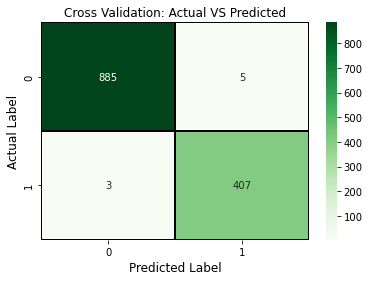

In [21]:
# Calls the heatmap function defined earlier for the cross validation results
heatmap(cross_val_labels, pred_cross_val_labels, "Cross Validation: Actual VS Predicted")

> The score obtained suggests that the performance of the model on the cross-validation dataset is adequate as well. However, for large datasets containing an imbalanced number of classes it has been shown in previous studies that single-value evaluation metrics may be susceptible to errors (Juba and Le 2019). <br><br>Given the imbalanced nature of our dataset containing 4648 (68%) noise and 2152 (30%) microearthquakes. It was therefore vital to assess the performance of the model with the use of other evaluation metrics such as precision-recall. Nonetheless, results from the other evaluation metrics confirm the good performance of the trained logistic regression model.<br><br>
The heatmap shows the misclassification between the actual labels and the predicted the cross-validation.

<a id="test"></a>
### Model Testing

In [22]:
# predicts the labels for the test dataset
pred_test_labels = log_regress_model.predict(test_set)

In [23]:
pred_test_labels

array([0., 0., 0., ..., 0., 0., 0.])

In [24]:
# Evaluates the performance of the model on the test dataset 
log_regress_model.score(test_set,test_labels)

0.9984615384615385

In [25]:
# Check the model performance by comparing the actual labels against the predicted labels
print(classification_report(test_labels, pred_test_labels))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       904
         1.0       1.00      1.00      1.00       396

    accuracy                           1.00      1300
   macro avg       1.00      1.00      1.00      1300
weighted avg       1.00      1.00      1.00      1300



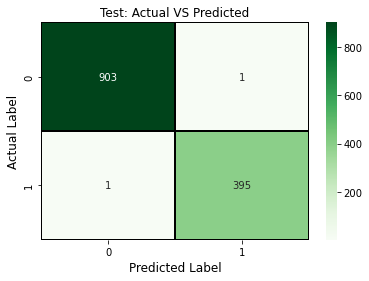

In [26]:
# Calls the heatmap function defined earlier for the test results
heatmap(test_labels, pred_test_labels, "Test: Actual VS Predicted")

> Results obtained from the testing proves that the trained logistic regression model performs well on both the cross-validation and testing datasets, with a slightly better perfomance for the testing dataset compared to the corss-validation dataset

<a id="conclusion"></a>
### Conclusion

> *Objective 1:* Data exploration and preprocessing were conducted on the provided dataset relying primarily on statistical information obtained about the data. Armed by this information, feature scaling was performed ensuring a better gradient descent convergence.<br>
*Objective 2:* The decent logistic regression model was adequately trained to facilitate the prediction of microearthquakes using microearthquake data.<br>
*Objective 3:* Although perfect accuracies were not achieved for either the cross-validation or the testing dataset, results for both cases, as deduced from the different evaluation metrics conducted on the cross-validation and testing datasets, all indicate that the trained logistic regression model performs well if provided with unseen data points.<br>
*Objective 4:* To implement the utilization of the tanh function in place of the sigmoid function, the first adjustment required would be to adjust the original labels used in training, validating, and testing the model to map from (0,1) to (-1,1), where -1 would represent noise and 1 would represent microearthquakes. This adjustment would be crucial to training the model because the tanh function maps to a range of (-1,1) as against the sigmoid function which maps to the probability range of (0,1).<br>
Following the adjustment of the labels, to implement this classification in python, the source code for the classification algorithm could either be written from scratch or the use of any python library which offers such functionality could be exploited. It is, however, crucial to point out that most current python libraries provide the use of the tanh function within the framework of neural networks. Therefore in using these libraries, we may be required to build the model under the framework of a neural network, albeit our network would be one consisting of a single neuron and no hidden layer.

<a id="reference"></a>
### References

- Alshaher, H., 2021. Studying the effects of feature scaling in machine learning (Doctoral dissertation, North Carolina Agricultural and Technical State University).
- Bisong, E. and Bisong, E., 2019. Optimization for machine learning: Gradient descent. Building Machine Learning and Deep Learning Models on Google Cloud Platform: A Comprehensive Guide for Beginners, pp.203-207.
- Gasso, G., 2019. Logistic regression. INSA Rouen-ASI Departement Laboratory: Saint-Etienne-du-Rouvray, France, pp.1-30.
- Juba, B. and Le, H.S., 2019. Precision-recall versus accuracy and the role of large data sets. In Proceedings of the AAAI conference on artificial intelligence (Vol. 33, No. 01, pp. 4039-4048).
- Pedregosa, F., Varoquaux, G., Gramfort, A., Michel, V., Thirion, B., Grisel, O., Blondel, M., Prettenhofer, P., Weiss, R., Dubourg, V. and Vanderplas, J., 2011. Scikit-learn: Machine learning in Python. the Journal of machine Learning research, 12, pp.2825-2830.
- Reitermanova, Z., 2010, June. Data splitting. In WDS (Vol. 10, pp. 31-36). Prague: Matfyzpress.